---
## Random summaries - BERT Similarity & Bert Score

----

Il s'agit dans la première partie de calculer la similarité cosinus sur une vectorisation Bert Sentence Transformer,  
entre le summary et le référence summary.  
Dans la deuxième partie on intègre également du Bert Score.


I. 1ère PARTIE : preprocessing et BERT similarity -----------------------------------------
  
1 - Réarticulation du df_random_summaries_llm_eval pour placer les summary gpt3.5 dans un colonne, à côté des summary d'un modèle. Les lignes chatgpt sont alors éliminées (2000 lignes à la place de 2400). 
   
2 - Nettoyer les summaries, pour éliminer les caractères spéciaux (même si les summaries sont plus propres que le texte original). Ce même nettoyage pourrait alors servir pour tester qq chose de similaire entre un summary (de référence ou pas) et le texte original. Ceci est un choix 'empirique'. 
  
3 - Vectoriser BerT Transformer du summary et du summary de référence.  
  
4 - Calcul de la similarité entre chaque summary et summary de reference. 
    
  
II. 2ème PARTIE : BERT SCORE -------------------------------------------------------

5 - Processing avec BERT SCORE comme alternative.

In [1]:
import pandas as pd
import numpy as np



In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc

palette = sns.color_palette(cc.glasbey_warm, n_colors=100)

In [3]:

df = pd.read_csv(r'D:\Documents\DATA_SCIENCE\DATASCIENTEST_juin_2024\PROJET\Huggingface\jun24_bc_llm\Panier_a_linge\DATASETS\df_random_summaries_llm_eval.csv')
#len(df)

# 1. Préparation / adaptation du df

In [4]:
# Créatino d'un id de référence pour chaque ligne
df.loc[:,'summary_ref_id'] = df.loc[:,'cluster_id'] + "_" + df.loc[:,"prompt_type"]

In [5]:
# créer un df séparé pour les summary chatgpt

df_ref = df[df['model_name'] == 'gpt3.5']
df_ref.columns = df_ref.columns.str.replace('summary','ref_summary')

df_ref.columns


Index(['cluster_id', 'clustered_text', 'id_50_3000', 'token_number', 'type',
       'base_id', 'model_name', 'prompt_type', 'ref_summary', 'duration',
       'ratio', 'Clarity_llm', 'Accuracy_llm', 'Coverage_llm', 'Overall_llm',
       'Explanations_refFree_llm', 'Score_refBase',
       'Explanations_refBased_llm', 'Accuracy_ref_llm', 'Conciseness_ref_llm',
       'Structure_ref_llm', 'refFree_llm_mean_score',
       'refBased_llm_mean_score', 'Clarity_llm_var', 'Accuracy_llm_var',
       'Coverage_llm_var', 'Overall_llm_var', 'Explanations_refFree_llm_var',
       'Accuracy_ref_llm_var', 'Conciseness_ref_llm_var',
       'Structure_ref_llm_var', 'Explanations_refBased_llm_var',
       'refFree_llm_mean_score_var', 'refBased_llm_mean_score_var',
       'ref_summary_ref_id'],
      dtype='object')

In [8]:
# éliminer les lignes chatgpt dans le df principal

df = df[df['model_name'] != 'gpt3.5']

In [9]:
# correction petite erreur
df_ref.columns = df_ref.columns.str.replace('ref_summary_ref_id','summary_ref_id')

In [10]:
df.columns

Index(['cluster_id', 'clustered_text', 'id_50_3000', 'token_number', 'type',
       'base_id', 'model_name', 'prompt_type', 'summary', 'duration', 'ratio',
       'Clarity_llm', 'Accuracy_llm', 'Coverage_llm', 'Overall_llm',
       'Explanations_refFree_llm', 'Score_refBase',
       'Explanations_refBased_llm', 'Accuracy_ref_llm', 'Conciseness_ref_llm',
       'Structure_ref_llm', 'refFree_llm_mean_score',
       'refBased_llm_mean_score', 'Clarity_llm_var', 'Accuracy_llm_var',
       'Coverage_llm_var', 'Overall_llm_var', 'Explanations_refFree_llm_var',
       'Accuracy_ref_llm_var', 'Conciseness_ref_llm_var',
       'Structure_ref_llm_var', 'Explanations_refBased_llm_var',
       'refFree_llm_mean_score_var', 'refBased_llm_mean_score_var',
       'summary_ref_id'],
      dtype='object')

In [11]:
# Refusionner 'left' pout réintegrer les summary chatgpt à côté de chaque summary

df_merged = df.merge(df_ref[['summary_ref_id', 'ref_summary']], on='summary_ref_id', how='left')


In [12]:
df_merged.head(3)

,cluster_id,clustered_text,id_50_3000,token_number,type,base_id,model_name,prompt_type,summary,duration,...,Overall_llm_var,Explanations_refFree_llm_var,Accuracy_ref_llm_var,Conciseness_ref_llm_var,Structure_ref_llm_var,Explanations_refBased_llm_var,refFree_llm_mean_score_var,refBased_llm_mean_score_var,summary_ref_id,ref_summary
0,R_medium_1,- The White House confirmed to FOX Business th...,"6110, 2566, 44559, 24889, 64042, 17363",1740.0,R_medium,0,gemma2,Elaborate,Here are the main facts and ideas from the pro...,221.729207,...,3.0,{'Clarity': 'The summary effectively communica...,4.0,3.0,2.0,"{'Accuracy': ""The provided summary captures mo...",3.0,2.666667,R_medium_1_Elaborate,- Reince Priebus is returning to Washington D....
1,R_medium_1,- The White House confirmed to FOX Business th...,"6110, 2566, 44559, 24889, 64042, 17363",1740.0,R_medium,0,llama3.1,Elaborate,"Here is a short, clear summary of the main fac...",19.121680,...,3.0,{'Clarity': 'The summary effectively communica...,4.0,3.0,2.0,"{'Accuracy': ""The provided summary captures mo...",3.0,2.666667,R_medium_1_Elaborate,- Reince Priebus is returning to Washington D....
2,R_medium_1,- The White House confirmed to FOX Business th...,"6110, 2566, 44559, 24889, 64042, 17363",1740.0,R_medium,0,mistral,Elaborate,* The White House confirmed that Reince Prieb...,12.033448,...,3.0,{'Clarity': 'The summary effectively communica...,4.0,3.0,5.0,"{'Accuracy': ""The provided summary captures mo...",3.0,3.666667,R_medium_1_Elaborate,- Reince Priebus is returning to Washington D....


# 2. Nettoyage des textes.

In [13]:
# Nettoyage : on crée une colonne 'text_prepr' et on laisse le 'text' original tranquille
# ----------------------------------------------------------------------------------------

# Fonction : df = df à nettoyer ; col_origin = colonne à nettoyer dans le df ; col = colonne accueillant le texte nettoyé

def cleaning(df,col_origin,col) : 
    df[col] = df.loc[:,col_origin].str.replace('WASHINGTON', ' ')
    df.loc[:,col] = df[col].str.replace(r'Reuters|reuters|REUTERS', ' ', regex=True)
    df.loc[:,col] = df[col].str.replace(r'Ä¶|Äô|Äù|Äú|Å©|äî|Äî', ' ', regex=True) #lié à la traduction depuis html. il y a probablement une meilleure méthode.
    df.loc[:,col] = df[col].str.replace(r'\bu\b', ' ', regex=True) # supprimer ou remplacer les 'u' qui représentent 'you'
    df.loc[:,col] = df[col].str.replace(r'\bs\b', ' ', regex=True) # supprimer les 's' qui représenent 'is' ou 'has'
    df.loc[:,col] = df[col].str.replace(r'\br\b', ' ', regex=True) # supprimer ou remplacer les 'r' qui représentent 'are'

# supprimer url, e-mail, special characters
    import re
    def remove_urls(text):
        if isinstance(text, str):
            url_pattern = re.compile(r'http[s]?://\S+|www\.\S+')
            return url_pattern.sub('', text)

    def remove_Emails(text):
        if isinstance(text, str):
            Email_pattern = re.compile(r'([a-zA-Z0-9_\.-]+)@([a-zA-Z0-9_\.-]+)\.([a-zA-Z]{2,5})')
            return Email_pattern.sub('', text)

    def remove_gobbledegook(text):
        if isinstance(text, str):
    # Supprimer les strings long composés de chiffres et de lettres (sans espaces, des codes d'identification probablement)
            GobblGook = re.compile(r'\b(?=[a-zA-Z0-9]*[A-Z])(?=[a-zA-Z0-9]*[a-z])(?=[a-zA-Z0-9]*\d)[a-zA-Z0-9]{8,12}\b')
            text = GobblGook.sub(' ', text)
            return text

    def remove_ATusername(text):
        if isinstance(text, str):
    # Supprimer les @username Twitter
            ATusername = re.compile(r'@([a-zA-Z0-9_\.-]+)')
            text = ATusername.sub(' ', text)
            return text

    def remove_hashtag(text) :
        if isinstance(text, str):
    # Supprimer hastags par ex. #blizzard2016
            ATusername = re.compile(r'#([a-zA-Z0-9_\.-]+)')
            text = ATusername.sub(' ', text)
            return text

    def remove_speCar_exclu_comma_dot(text):
        if isinstance(text, str):
    # Supprimer tous les caractères spéciaux et ponctuation sauf points et virgules (en cas de sentence tokenization)
            remove_punctuation = re.compile(r'[^\w\s]')
            text = remove_punctuation.sub(' ', text)
            return text

    df.loc[:,col] = df[col].apply(remove_urls)
    df.loc[:,col] = df[col].apply(remove_Emails)
    df.loc[:,col] = df[col].apply(remove_gobbledegook)
    df.loc[:,col] = df[col].apply(remove_ATusername)
    df.loc[:,col] = df[col].apply(remove_hashtag)
    df.loc[:,col] = df[col].apply(remove_speCar_exclu_comma_dot)
    df.loc[:,col] = df[col].str.replace('.', '. ') # parfois certaines phrases successives collent l'une à l'autre.
    df.loc[:,col] = df[col].str.replace('  ', ' ')
    df.loc[:,col] = df[col].str.replace('   ', ' ')

In [14]:

# nettoyer le summary de référence et créer une nouvelle colonne clean
cleaning(df_merged,'ref_summary','clean_ref_summary')

In [15]:
# nettoyer le summary  et créer une nouvelle colonne clean
cleaning(df_merged,'summary','clean_summary')

In [16]:
df_merged.head(2)

,cluster_id,clustered_text,id_50_3000,token_number,type,base_id,model_name,prompt_type,summary,duration,...,Accuracy_ref_llm_var,Conciseness_ref_llm_var,Structure_ref_llm_var,Explanations_refBased_llm_var,refFree_llm_mean_score_var,refBased_llm_mean_score_var,summary_ref_id,ref_summary,clean_ref_summary,clean_summary
0,R_medium_1,- The White House confirmed to FOX Business th...,"6110, 2566, 44559, 24889, 64042, 17363",1740.0,R_medium,0,gemma2,Elaborate,Here are the main facts and ideas from the pro...,221.729207,...,4.0,3.0,2.0,"{'Accuracy': ""The provided summary captures mo...",3.0,2.666667,R_medium_1_Elaborate,- Reince Priebus is returning to Washington D....,Reince Priebus is returning to Washington D C...,Here are the main facts and ideas from the pro...
1,R_medium_1,- The White House confirmed to FOX Business th...,"6110, 2566, 44559, 24889, 64042, 17363",1740.0,R_medium,0,llama3.1,Elaborate,"Here is a short, clear summary of the main fac...",19.121680,...,4.0,3.0,2.0,"{'Accuracy': ""The provided summary captures mo...",3.0,2.666667,R_medium_1_Elaborate,- Reince Priebus is returning to Washington D....,Reince Priebus is returning to Washington D C...,Here is a short clear summary of the main fact...


## 3. Vectorisation SBERT

In [17]:

# ------------------------------------------------------
# 3. CORPUS REUNI EN LISTE EXTERIEUR : chaque summary devient un 'document' dans une liste all_ref_summary ou all_clean_summary
# --------------------------------------------------------
all_ref_summary=  [doc for doc in df_merged['clean_ref_summary']]
all_clean_summary=  [doc for doc in df_merged['clean_summary']]


In [18]:
#from sentence_transformers import SentenceTransformer

In [18]:
#from sentence_transformers import SentenceTransformer
# Appliquer le Sentence Transformer (env 3min30 pour les deux sur VS code)
# -------------------------------------
"""
model = SentenceTransformer('all-MiniLM-L6-v2')

# encodage
doc_embed_ref_summary = model.encode(all_ref_summary)
doc_embed_summary = model.encode(all_clean_summary)

type(doc_embed_ref_summary)
"""

"\nmodel = SentenceTransformer('all-MiniLM-L6-v2')\n\n# encodage\ndoc_embed_ref_summary = model.encode(all_ref_summary)\ndoc_embed_summary = model.encode(all_clean_summary)\n\ntype(doc_embed_ref_summary)\n"

In [20]:

# vérifier :

#print(doc_embed_ref_summary.shape)
#print(doc_embed_summary.shape)
"""
np.save('doc_embed_random_ref_summary.npy', doc_embed_ref_summary)
np.save('doc_embed_random_summary.npy', doc_embed_summary)
"""

"\nnp.save('doc_embed_random_ref_summary.npy', doc_embed_ref_summary)\nnp.save('doc_embed_random_summary.npy', doc_embed_summary)\n"

In [21]:
doc_embed_ref_summary = np.load('doc_embed_random_ref_summary.npy')
doc_embed_summary = np.load('doc_embed_random_summary.npy')

In [22]:
df_merged['Bert_ref_summary'] = doc_embed_ref_summary.tolist()
df_merged['Bert_summary'] = doc_embed_summary.tolist()

# 4. Calcul Similarités Cosinus entre résumé de ref et résumé

In [24]:
# Calculer la cosine similarity entre summary et reference_summary

import numpy as np
from numpy.linalg import norm

from sklearn.metrics.pairwise import cosine_similarity


# def fonction :
def calculate_cosine_similarity(row):
    v1 = np.array(row['Bert_ref_summary']).reshape(1, -1)  # de liste en numpy array
    v2 = np.array(row['Bert_summary']).reshape(1, -1) # de liste en numpy array
    return cosine_similarity(v1, v2)[0][0]  # Get the cosine similarity value



# appliquer :

df_merged['cosine_similarity'] = df_merged.apply(calculate_cosine_similarity, axis=1)

display(df_merged.head(3))




,cluster_id,clustered_text,id_50_3000,token_number,type,base_id,model_name,prompt_type,summary,duration,...,Explanations_refBased_llm_var,refFree_llm_mean_score_var,refBased_llm_mean_score_var,summary_ref_id,ref_summary,clean_ref_summary,clean_summary,Bert_ref_summary,Bert_summary,cosine_similarity
0,R_medium_1,- The White House confirmed to FOX Business th...,"6110, 2566, 44559, 24889, 64042, 17363",1740.0,R_medium,0,gemma2,Elaborate,Here are the main facts and ideas from the pro...,221.729207,...,"{'Accuracy': ""The provided summary captures mo...",3.0,2.666667,R_medium_1_Elaborate,- Reince Priebus is returning to Washington D....,Reince Priebus is returning to Washington D C...,Here are the main facts and ideas from the pro...,"[-0.008337216451764107, -0.0005758627085015178...","[-0.030072081834077835, 0.02755172736942768, -...",0.778904
1,R_medium_1,- The White House confirmed to FOX Business th...,"6110, 2566, 44559, 24889, 64042, 17363",1740.0,R_medium,0,llama3.1,Elaborate,"Here is a short, clear summary of the main fac...",19.121680,...,"{'Accuracy': ""The provided summary captures mo...",3.0,2.666667,R_medium_1_Elaborate,- Reince Priebus is returning to Washington D....,Reince Priebus is returning to Washington D C...,Here is a short clear summary of the main fact...,"[-0.008337216451764107, -0.0005758627085015178...","[-0.017122169956564903, 0.022448748350143433, ...",0.769471
2,R_medium_1,- The White House confirmed to FOX Business th...,"6110, 2566, 44559, 24889, 64042, 17363",1740.0,R_medium,0,mistral,Elaborate,* The White House confirmed that Reince Prieb...,12.033448,...,"{'Accuracy': ""The provided summary captures mo...",3.0,3.666667,R_medium_1_Elaborate,- Reince Priebus is returning to Washington D....,Reince Priebus is returning to Washington D C...,The White House confirmed that Reince Priebu...,"[-0.008337214589118958, -0.0005758805782534182...","[-0.0539507158100605, 0.01363056804984808, 0.0...",0.824779


---------
### Similarity : Quelques premières visualisations
-----------


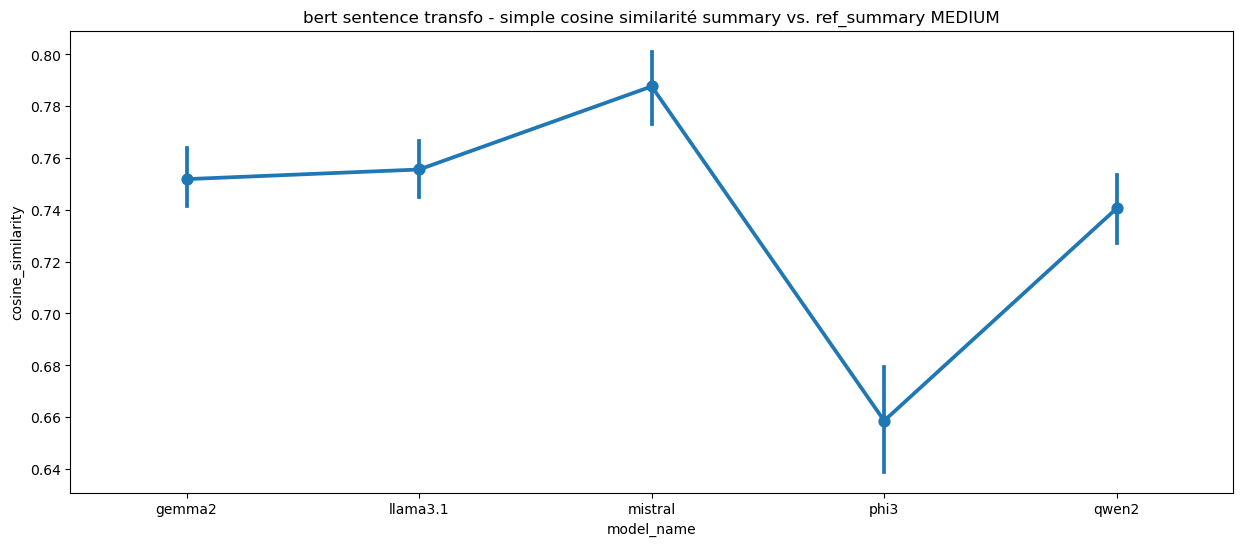

In [21]:
import seaborn as sns
fig, ax = plt.subplots(figsize=[15,6])
sns.pointplot(data = df_merged[df_merged['type']=='R_medium'], x = 'model_name', y = 'cosine_similarity')
#sns.violinplot(y="cosine_similarity", x="model_name", data=df, ax=ax)
plt.title("bert sentence transfo - simple cosine similarité summary vs. ref_summary MEDIUM")
plt.show()

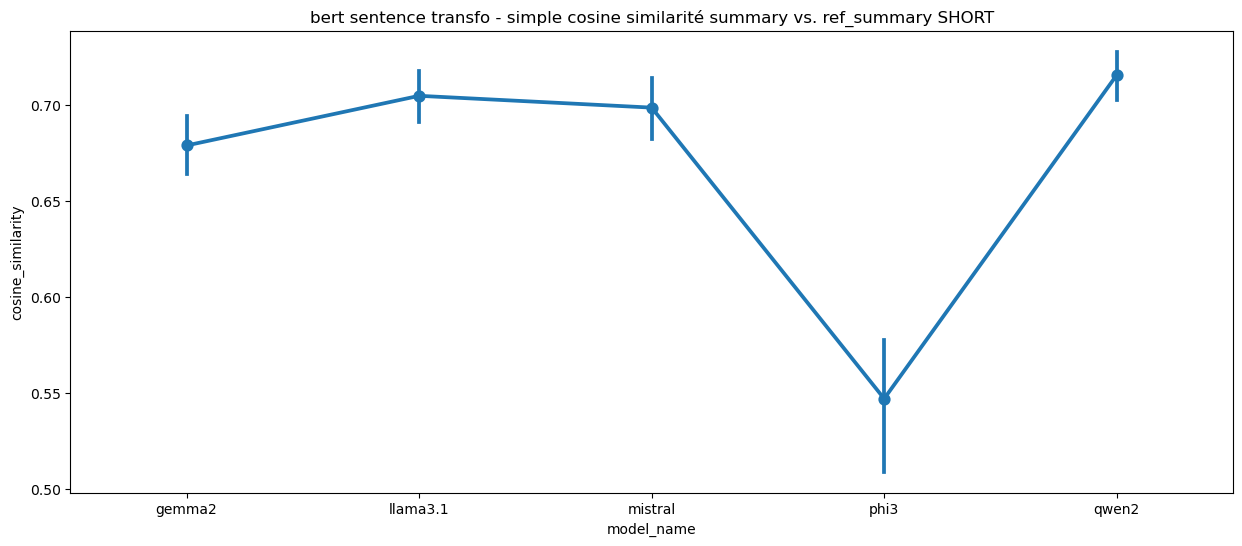

In [22]:

fig, ax = plt.subplots(figsize=[15,6])
sns.pointplot(data = df_merged[df_merged['type']=='R_short'], x = 'model_name', y = 'cosine_similarity')
#sns.violinplot(y="cosine_similarity", x="model_name", data=df, ax=ax)
plt.title("bert sentence transfo - simple cosine similarité summary vs. ref_summary SHORT")
plt.show()

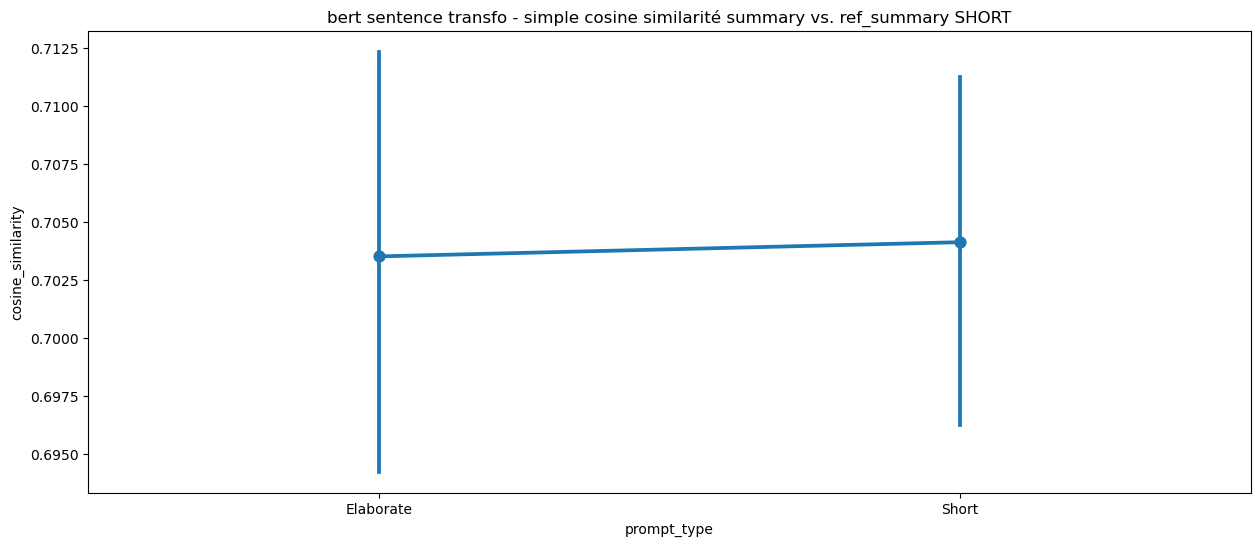

In [24]:
fig, ax = plt.subplots(figsize=[15,6])
sns.pointplot(data = df_merged, x = 'prompt_type', y = 'cosine_similarity')
#sns.violinplot(y="cosine_similarity", x="model_name", data=df, ax=ax)
plt.title("bert sentence transfo - simple cosine similarité summary vs. ref_summary SHORT")
plt.show()

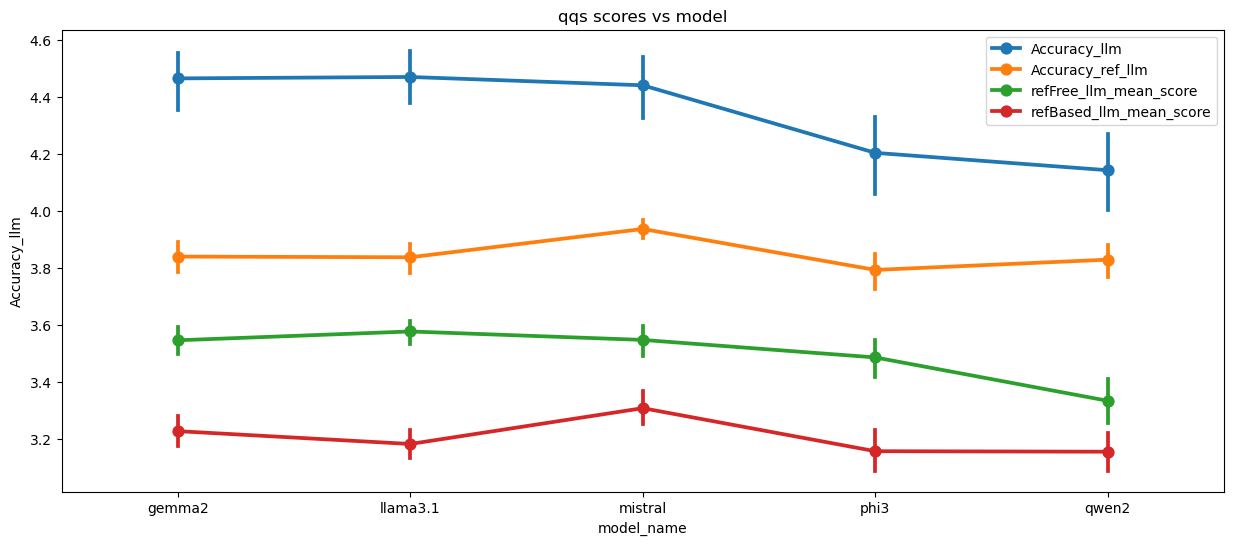

In [25]:

fig, ax = plt.subplots(figsize=[15,6])
sns.pointplot(data = df_merged, x = 'model_name', y = 'Accuracy_llm', label = 'Accuracy_llm')
sns.pointplot(data = df_merged, x = 'model_name', y = 'Accuracy_ref_llm', label = 'Accuracy_ref_llm')
sns.pointplot(data = df_merged, x = 'model_name', y = 'refFree_llm_mean_score', label = 'refFree_llm_mean_score')
sns.pointplot(data = df_merged, x = 'model_name', y = 'refBased_llm_mean_score', label = 'refBased_llm_mean_score')
#sns.violinplot(y="cosine_similarity", x="model_name", data=df, ax=ax)
plt.title("qqs scores vs model")
plt.legend()
plt.show()

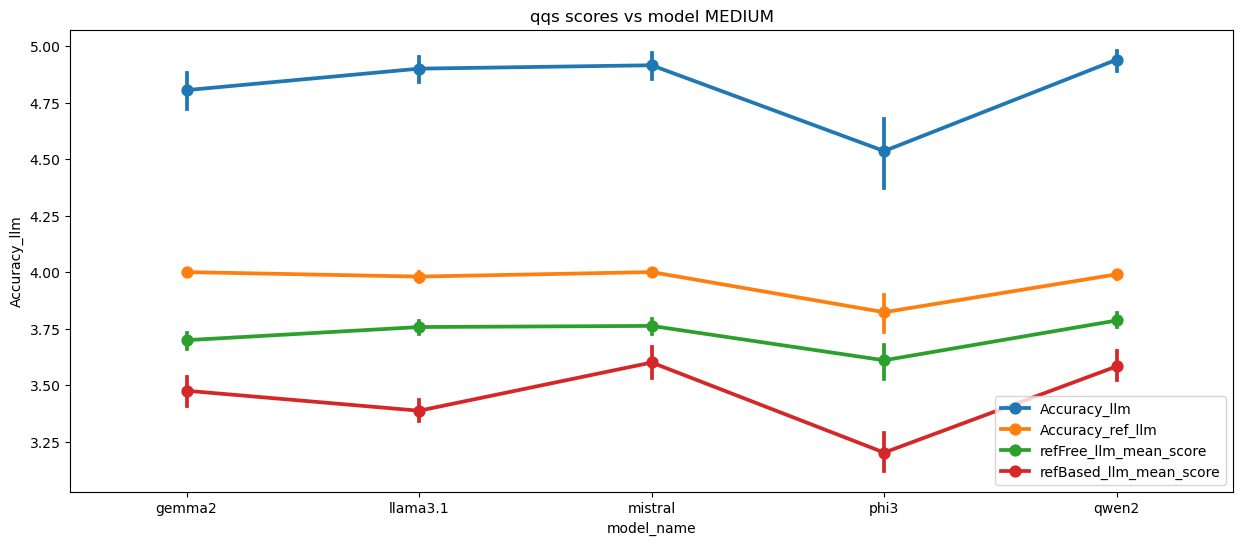

In [52]:

fig, ax = plt.subplots(figsize=[15,6])
sns.pointplot(data = df_merged[df_merged['type']=='R_medium'], x = 'model_name', y = 'Accuracy_llm', label = 'Accuracy_llm')
sns.pointplot(data = df_merged[df_merged['type']=='R_medium'], x = 'model_name', y = 'Accuracy_ref_llm', label = 'Accuracy_ref_llm')
sns.pointplot(data = df_merged[df_merged['type']=='R_medium'], x = 'model_name', y = 'refFree_llm_mean_score', label = 'refFree_llm_mean_score')
sns.pointplot(data = df_merged[df_merged['type']=='R_medium'], x = 'model_name', y = 'refBased_llm_mean_score', label = 'refBased_llm_mean_score')
#sns.violinplot(y="cosine_similarity", x="model_name", data=df, ax=ax)
plt.title("qqs scores vs model MEDIUM")
plt.legend()
plt.show()

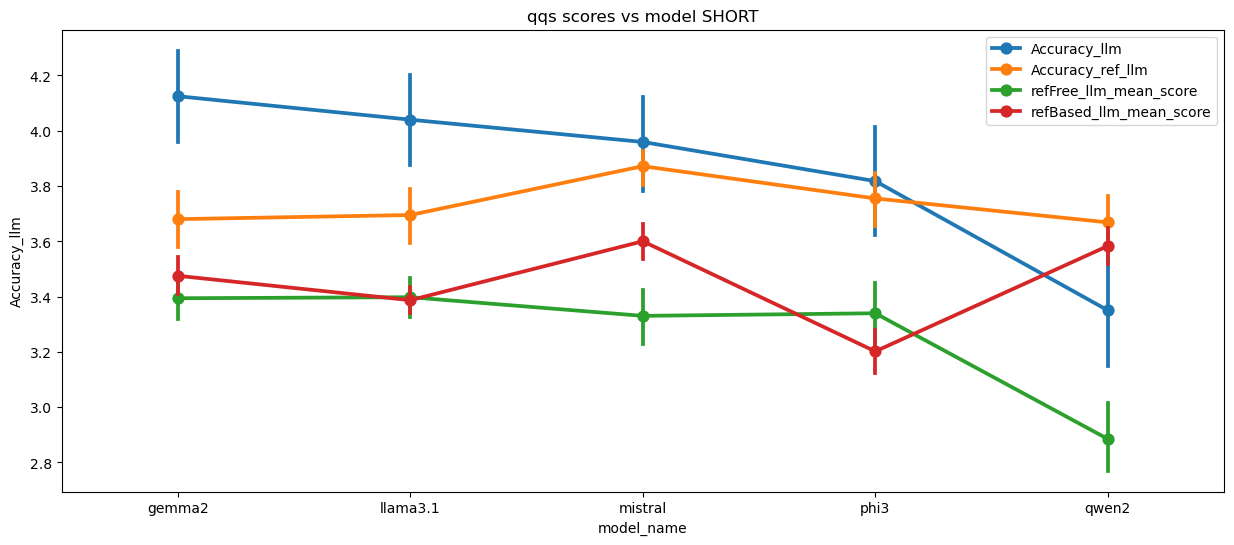

In [51]:

fig, ax = plt.subplots(figsize=[15,6])
sns.pointplot(data = df_merged[df_merged['type']=='R_short'], x = 'model_name', y = 'Accuracy_llm', label = 'Accuracy_llm')
sns.pointplot(data = df_merged[df_merged['type']=='R_short'], x = 'model_name', y = 'Accuracy_ref_llm', label = 'Accuracy_ref_llm')
sns.pointplot(data = df_merged[df_merged['type']=='R_short'], x = 'model_name', y = 'refFree_llm_mean_score', label = 'refFree_llm_mean_score')
sns.pointplot(data = df_merged[df_merged['type']=='R_medium'], x = 'model_name', y = 'refBased_llm_mean_score', label = 'refBased_llm_mean_score')
#sns.violinplot(y="cosine_similarity", x="model_name", data=df, ax=ax)
plt.title("qqs scores vs model SHORT")
plt.legend()
plt.show()

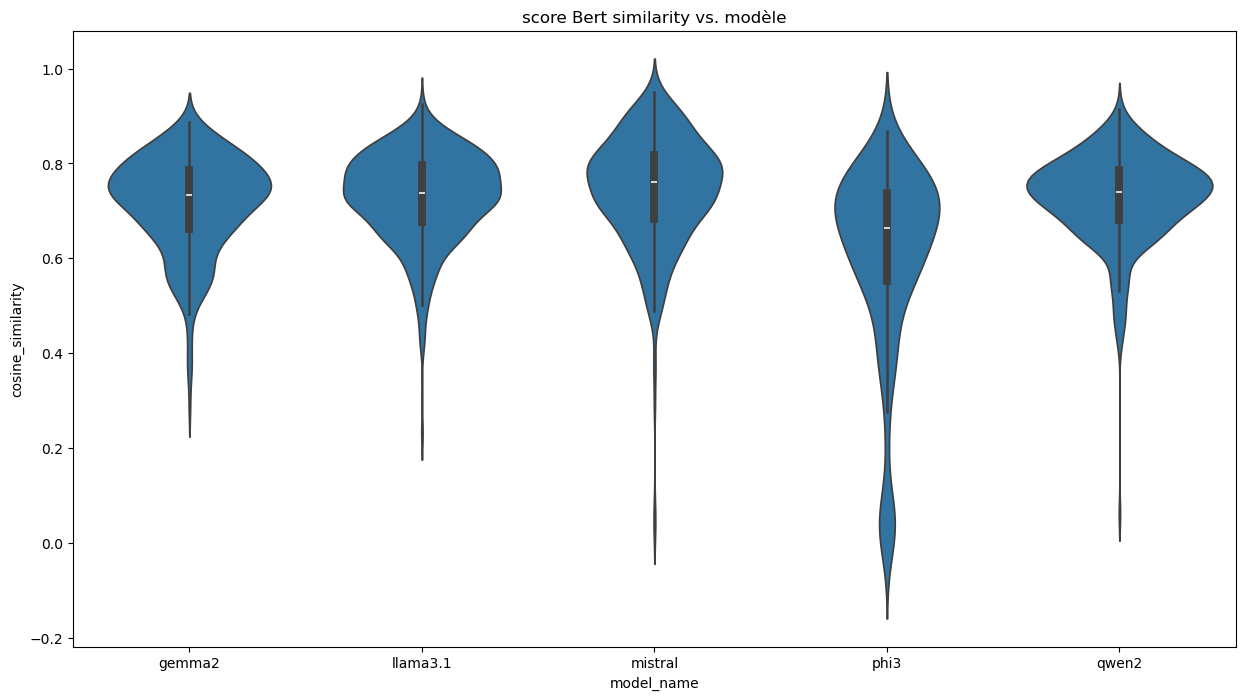

In [50]:
#
# ------------------------------------------------------------------------------



fig, ax = plt.subplots(figsize=[15,8])
sns.violinplot(y="cosine_similarity", x="model_name", data=df_merged, ax=ax)
plt.title("score Bert similarity vs. modèle")
plt.show()


# 5. BERT SCORE

In [25]:
#!pip install bert-score

In [26]:
from transformers import BertTokenizer, BertModel
from bert_score import BERTScorer

scorer = BERTScorer(model_type='bert-base-uncased')

In [31]:
def BertScore(summary, reference) : 
    _, _, F1 = scorer.score([summary], [reference])
    return F1.item()

In [32]:
df_merged['Bert_Score'] = df_merged.apply(lambda x : BertScore(x['clean_summary'], x['clean_ref_summary']),axis =1)
# !! durée env. 32 minutes

In [ ]:
df.dtypes

In [33]:

#df2 = pd.read_excel#(r'D:\Documents\DATA_SCIENCE\DATASCIENTEST_juin_2024\PROJET\Huggingface\jun24_bc_llm\notebooks\DATA_WorkInProgr\df_random_summariesBERTscore.xlsx')
df_merged.to_excel(r'D:\Documents\DATA_SCIENCE\DATASCIENTEST_juin_2024\PROJET\Huggingface\jun24_bc_llm\notebooks\df_random_summariesBERTscore.xlsx')

---------
### Bert Score : Quelques premières visualisations
-----------

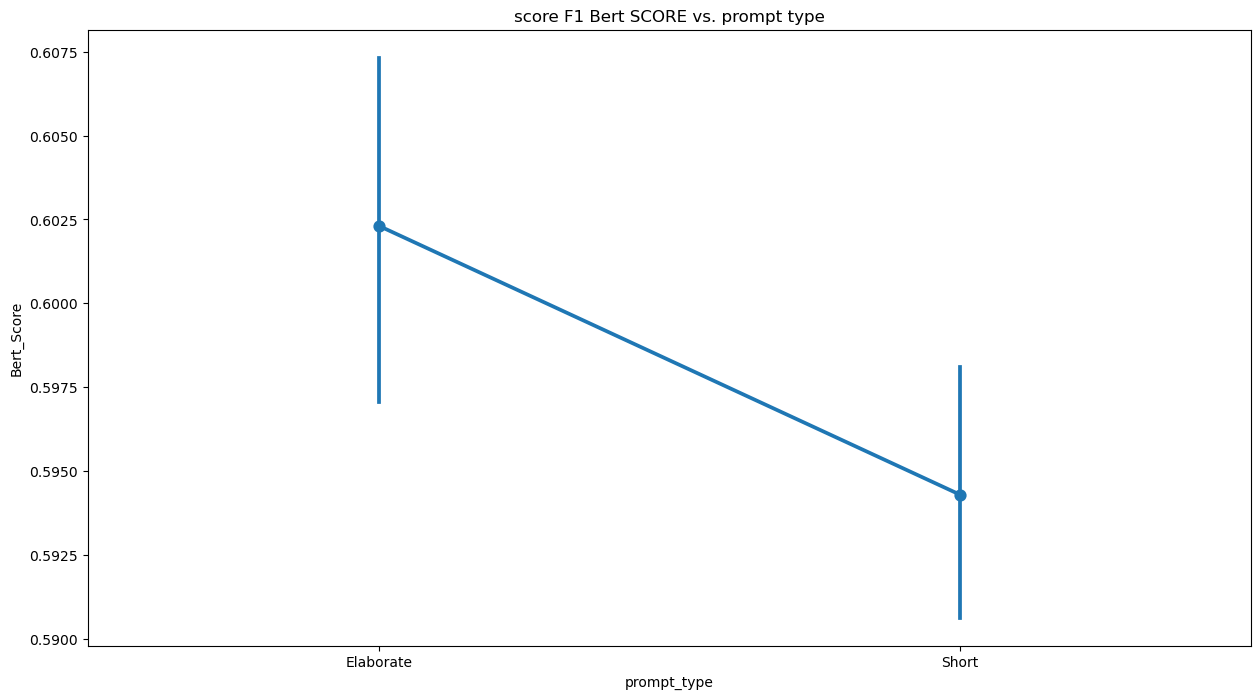

In [36]:

fig, ax = plt.subplots(figsize=[15,8])
sns.pointplot(y="Bert_Score", x="prompt_type", data=df_merged, ax=ax)
plt.title("score F1 Bert SCORE vs. prompt type")
plt.show()


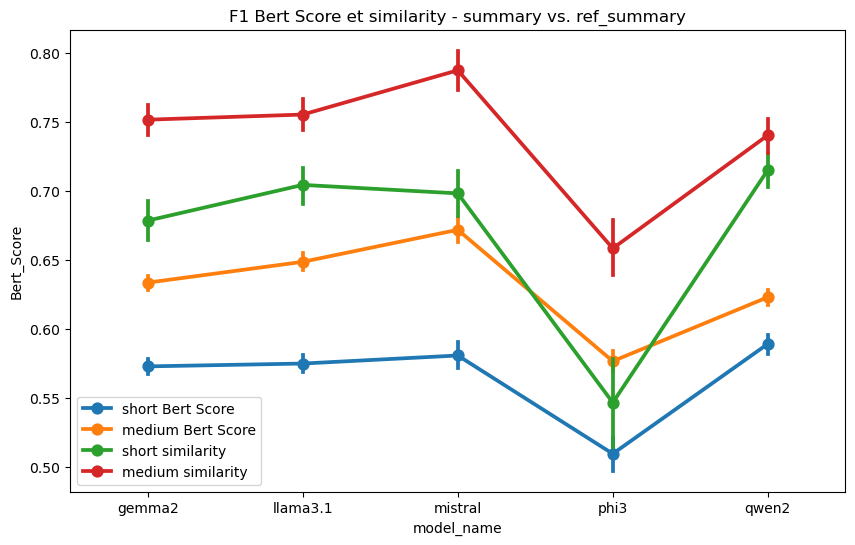

In [41]:
fig, ax = plt.subplots(figsize=[10,6])
sns.pointplot(data = df_merged[df_merged['type']=='R_short'], x = 'model_name', y = 'Bert_Score', label ='short Bert Score')
sns.pointplot(data = df_merged[df_merged['type']=='R_medium'], x = 'model_name', y = 'Bert_Score', label = 'medium Bert Score')
sns.pointplot(data = df_merged[df_merged['type']=='R_short'], x = 'model_name', y = 'cosine_similarity', label ='short similarity')
sns.pointplot(data = df_merged[df_merged['type']=='R_medium'], x = 'model_name', y = 'cosine_similarity', label = 'medium similarity')
#sns.violinplot(y="cosine_similarity", x="model_name", data=df, ax=ax)
plt.title("F1 Bert Score et similarity - summary vs. ref_summary")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


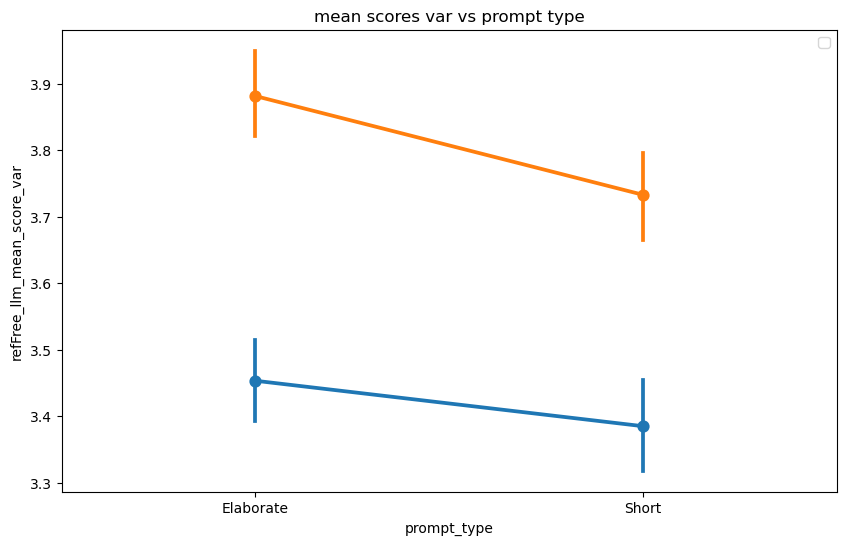

In [39]:
fig, ax = plt.subplots(figsize=[10,6])
sns.pointplot(data = df_merged, x = 'prompt_type', y = 'refFree_llm_mean_score_var')
sns.pointplot(data = df_merged, x = 'prompt_type', y = 'Accuracy_llm_var')
#sns.pointplot(data = df3, x = 'model_name', y = 'cosine_similarity', label ='short similarity')
#sns.pointplot(data = df3, x = 'model_name', y = 'cosine_similarity', label = 'medium similarity')
#sns.violinplot(y="cosine_similarity", x="model_name", data=df, ax=ax)
plt.title("mean scores var vs prompt type")
plt.legend()
plt.show()